# Ejercicio 17

## Enunciado
Crea un programa que:

1. Lea los datos del fichero **registros.csv** pertenecientes al uso de una aplicación.
2. Genere un mapa de calor donde se pueda apreciar a qué horas de que día de la semana es mayor el número de conexiones.

### ¿Qué cosas nuevas necesitamos saber?
- Mapas de calor.

### Mapas de calor.

Los mapas de calor son gráficos con los que podemos ver la relación de 2 variables.

Realicemos un ejemplo con granjas y tipos de animales.

In [1]:
# recordad que es necesario hacer los import precedentes
from matplotlib import pyplot as plt
%matplotlib inline

In [2]:
granjas = ['A', 'B', 'C', 'D', 'E', 'F', 'G']
animales = ['Vacas', 'Toros', 'Gallinas', 'Gallos', 'Cerdos', 'Cabras', 'Ovejas', 'Otros']

In [3]:
import random
random.seed(42) # fijamos el seed para que nos genere a todos los mismos números aleatorios la primera vez

In [4]:
# esto genera una una lista de listas
# donde cada uno de los elementos de la lista es el número de animales de un tipo  que hay en cada granja
datos = [[random.randint(100, 500) for granja in granjas] for animal in animales]

In [5]:
for animal, cuantos in zip(animales, datos):
    print(animal, cuantos)

Vacas [427, 157, 112, 479, 240, 225, 214]
Toros [171, 477, 152, 446, 479, 379, 144]
Gallinas [402, 316, 116, 115, 147, 211, 219]
Gallos [358, 408, 113, 387, 201, 466, 432]
Cerdos [459, 379, 314, 212, 329, 401, 242]
Cabras [103, 488, 181, 457, 316, 274, 242]
Ovejas [179, 210, 490, 272, 152, 147, 294]
Otros [149, 283, 276, 409, 235, 122, 473]


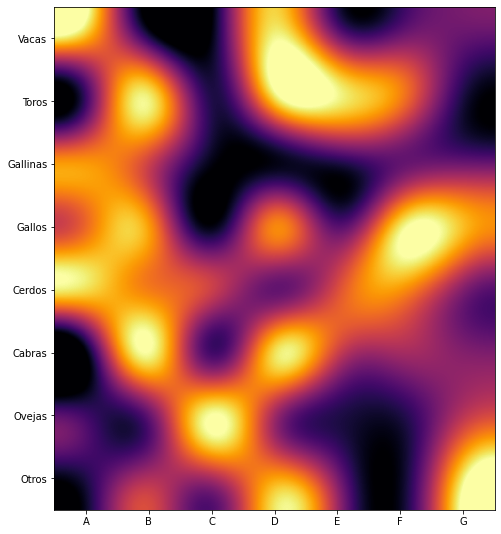

In [6]:
plt.figure(figsize=(len(granjas), len(animales))) # doy el tamaño correspondiente en función de lo que voy a pintar
plt.imshow(datos, interpolation='lanczos', cmap='inferno') # paso la matriz de datos, la interpolación y el mapa de colores
plt.xticks(range(len(granjas)), labels=granjas) # etiquetas del eje X -> posiciones y etiquetas de cada posición
plt.yticks(range(len(animales)), labels=animales) # etiquetas del eje Y -> posiciones y etiquetas de cada posición
plt.tight_layout()
plt.show()

Como podemos comprobar, las zonas más amarillas corresponden con las que hay un mayor número de animales (Vacas en A, Otros en G...) y las más azuladas las que menos tienen (Toros y Cabras en A, Gallos en C...).

Respecto a los parámetros interpolation y cmap, podéis ver los distintos tipos aquí:
- [interporlation](https://matplotlib.org/3.1.1/gallery/images_contours_and_fields/interpolation_methods.html#sphx-glr-gallery-images-contours-and-fields-interpolation-methods-py)
- [cmap](https://matplotlib.org/3.1.1/gallery/color/colormap_reference.html)

Antes de comenzar, quizás te sea útil pasarte por [aquí](https://docs.python.org/3/library/datetime.html#datetime.time.hour) para saber como obtener la hora a partir de un datetime().

Suerte!

## Solución

In [1]:
from matplotlib import pyplot as plt
%matplotlib inline

In [2]:
from datetime import datetime

In [3]:
with open('../Otros/registros.csv', 'r') as f:
    texto = f.read()
    f.close()

In [4]:
texto_en_filas = texto.splitlines()

In [12]:
# como podemos comprobar tenemos cabeceras en la primera fila, 2 campos y separados por ;
def formatea_registro(fila):
    fecha_texto, duracion_texto = fila.split(";")
    fecha = datetime.strptime(fecha_texto, "%Y/%m/%d %H:%M")
    registro = {
        'dia_semana': fecha.weekday(),
        'hora': fecha.hour
    }
    return registro

In [13]:
registros = list(map(formatea_registro, texto_en_filas[1:]))

In [14]:
dias_semana = ['Lunes', 'Martes', 'Miercoles', 'Jueves', 'Viernes', 'Sábado', 'Domingo']

In [17]:
# inicializamos la matriz de datos a 0
valores = [[0 for hora in range(24)] for dia in dias_semana]

In [18]:
for reg in registros:
    dia, hora = reg.get('dia_semana'), reg.get('hora')
    valores[dia][hora] += 1

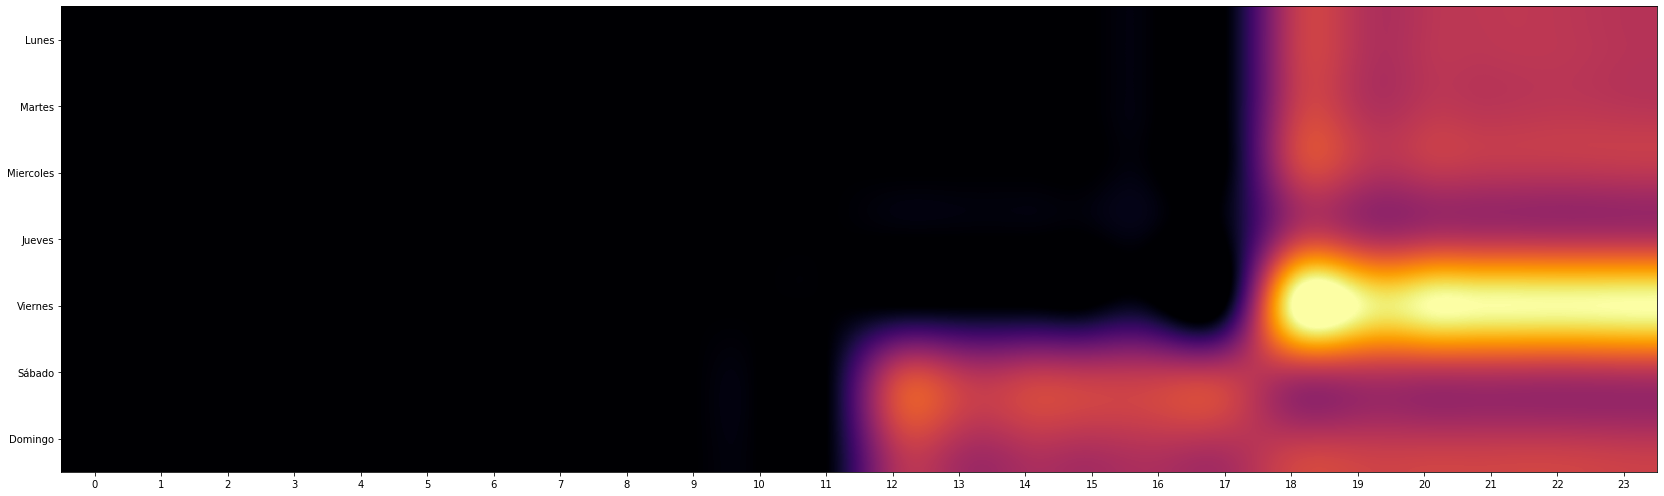

In [27]:
plt.figure(figsize=(24, 7))
plt.imshow(valores, interpolation='lanczos', cmap='inferno')
plt.xticks(range(24), labels=range(24))
plt.yticks(range(7), labels=dias_semana)
plt.tight_layout()
plt.show()